# 实践课15
## 1&emsp;内容
#### 1.&emsp;欧拉方法绝对稳定性

当步长>=1时不收敛，此时|1+\lambda*h|>=1


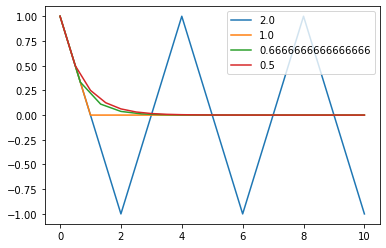

In [86]:
import numpy as np
import matplotlib.pyplot as plt

#标准欧拉法
def ode_euler(f,a,b,y0,n):
    h=(b-a)/n
    y_it=np.zeros(n+1)
    y_it[0]=y0
    x=a
    y=y0
    for i in range(n):
        y+=h*f(x,y)
        x+=h
        y_it[i+1]=y
    return y_it

def f(x,y):return -y
for n in range(5,21,5):
    h=10/n
    x=np.linspace(0,10,n+1)
    y=ode_euler(f,0,10,1,n)
    plt.plot(x,y,label=h)
plt.legend()
plt.show
print('当步长>=1时不收敛，此时|1+\lambda*h|>=1')

#### 2.&emsp;自适应步长

自适应步长欧拉法的数值解为 [1.         1.09551843 1.1833562  1.2651177  1.34195705 1.41464637
 1.48380084 1.54989934 1.6133239  1.67442718 1.73342908]


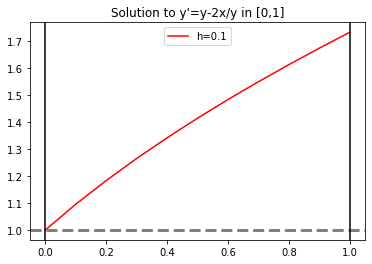

In [46]:
#自适应步长解方程
import numpy as np
import matplotlib.pyplot as plt

#标准欧拉法
def ode_euler(f,a,b,y0,n):
    h=(b-a)/n
    y_it=np.zeros(n+1)
    y_it[0]=y0
    x=a
    y=y0
    for i in range(n):
        y+=h*f(x,y)
        x+=h
        y_it[i+1]=y
    return y_it

#自适应步长欧拉法
def ode_euler_vary(f,a,b,y0,n,eps=10**-4):
    h=(b-a)/n
    y_it=np.zeros(n+1)
    y_it[0]=y0
    x=np.linspace(a,b,n+1)
    for i in range(n):
        k=2
        I1=ode_euler(f,x[i],x[i+1],y_it[i],k-1)[-1]
        error=eps
        while error>=eps:
            I2=ode_euler(f,x[i],x[i+1],y_it[i],2*k-1)[-1]
            error=np.abs(I1-I2)
            I1=I2
            k*=2
        y_it[i+1]=I1
    return y_it

def f(x,y):return y-2*x/y
n=10
y=ode_euler_vary(f,0,1,1,n)
print('自适应步长欧拉法的数值解为',y)

x=np.linspace(0,1,n+1)
plt.plot(x,y,color='red',linewidth=1.5,label='h=0.1')
plt.axhline(1.0, color='gray', linewidth=3, linestyle='--')
plt.axvline(0, color='black')
plt.axvline(1, color='black')
plt.title("Solution to y'=y-2x/y in [0,1]")
plt.legend()
plt.show()

u的数值解为 [0.         0.01003333 0.02016666 ... 0.11145872 0.11133445 0.11121046]
v的数值解为 [ 1.          1.00999981  1.01999794 ... -0.012436   -0.01240825
 -0.01238059]


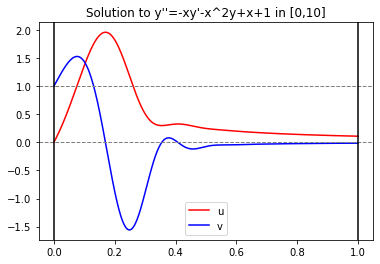

In [47]:
#自适应步长解方程组
import numpy as np
import matplotlib.pyplot as plt

#标准欧拉法
def odevec_euler(f1,f2,a,b,y1,y2,n):
    h=(b-a)/n
    y1_it=np.zeros(n+1)
    y2_it=np.zeros(n+1)
    y1_it[0]=y1
    y2_it[0]=y2
    x=a
    for i in range(n):
        y1_it[i+1]=y1_it[i]+h*f1(x,y1_it[i],y2_it[i])
        y2_it[i+1]=y2_it[i]+h*f2(x,y1_it[i],y2_it[i])
        x+=h
    return y1_it,y2_it

#自适应步长欧拉法
def odevec_euler_vary(f1,f2,a,b,y1,y2,n,eps=10**-4):
    h=(b-a)/n
    y1_it=np.zeros(n+1)
    y2_it=np.zeros(n+1)
    y1_it[0]=y1
    y2_it[0]=y2
    x=np.linspace(a,b,n+1)
    for i in range(n):
        k=2
        I11=odevec_euler(f1,f2,x[i],x[i+1],y1_it[i],y2_it[i],k-1)[0][-1]
        I12=odevec_euler(f1,f2,x[i],x[i+1],y1_it[i],y2_it[i],k-1)[1][-1]
        error=eps
        while error>=eps:
            I21=odevec_euler(f1,f2,x[i],x[i+1],y1_it[i],y2_it[i],2*k-1)[0][-1]
            I22=odevec_euler(f1,f2,x[i],x[i+1],y1_it[i],y2_it[i],2*k-1)[1][-1]
            error=np.sqrt((I21-I11)**2+(I22-I12)**2)
            I11=I21
            I12=I22
            k*=2
        y1_it[i+1]=I11
        y2_it[i+1]=I12
    return y1_it,y2_it
    
def f1(x,y1,y2):return y2
def f2(x,y1,y2):return -x**2*y1-x*y2+x+1
n=1000
y1_it,y2_it=odevec_euler_vary(f1,f2,0,10,0,1,n)
print('u的数值解为',y1_it)
print('v的数值解为',y2_it)

x=np.linspace(0,1,n+1)
plt.plot(x,y1_it,color='red',linewidth=1.5,label='u')
plt.plot(x,y2_it,color='blue',linewidth=1.5,label='v')
plt.axhline(0, color='gray', linewidth=1, linestyle='--')
plt.axhline(1.0, color='gray', linewidth=1, linestyle='--')
plt.axvline(0, color='black')
plt.axvline(1, color='black')
plt.title("Solution to y''=-xy'-x^2y+x+1 in [0,10]")
plt.legend()
plt.show()

#### 3.&emsp;函数OdeSolver,OdeSolution,RK23,RK45

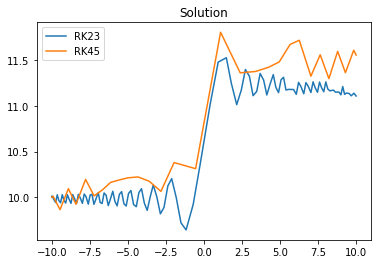

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def f(x,y):
    return np.cos(x**2)

x = np.linspace(-10,10,1000)
y0 = [10]   
y1 = solve_ivp(f,(-10.0,10.0), y0, method='RK23', x_eval=x)
y2 = solve_ivp(f,(-10.0,10.0), y0, method='RK45', x_eval=x)
plt.plot(y1.t,y1.y[0],label='RK23')
plt.plot(y2.t,y2.y[0],label='RK45')
plt.title('Solution')
plt.legend()
plt.show() 

## 2&emsp;练习
#### 1.&emsp;用自适应步长算法，求解初值问题
$$\begin{cases}
u'=u+u^2\quad t\in(0,4]\\
u(0)=1/15\\
\end{cases}$$

数值解为 [0.06666667 0.08263868 0.10281102 0.12849165 0.16152603 0.20459893
 0.26174542 0.33935597 0.44815709 0.6076661  0.85757392 1.29292534
 2.21252794 5.29733328        inf        inf        inf        inf
        inf        inf        inf]


C:\Users\mpure\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in double_scalars
  """Entry point for launching an IPython kernel.
C:\Users\mpure\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


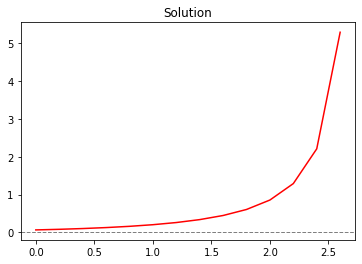

In [42]:
def f(x,y):return y+y**2

n=20
x=np.linspace(0,4,n+1)
y=ode_euler_vary(f,0,4,1/15,n)

print('数值解为',y)
plt.plot(x,y,color='red',linewidth=1.5)
plt.axhline(0, color='gray', linewidth=1, linestyle='--')
plt.title('Solution')
plt.show()

#### 2.&emsp;用自适应步长算法，求解初值问题
$$\begin{cases}
x'=4x-2xy\quad t\in(0,5]\\
y'=xy-3y\quad t\in(0,5]\\
x(0)=3,y(0)=5\\
\end{cases}$$

u的数值解为 [3.         2.91130414 2.82529113 ... 1.15266223 1.16703144 1.18166154]
v的数值解为 [5.         4.99892157 4.99565987 ... 0.76087231 0.75388403 0.74701408]


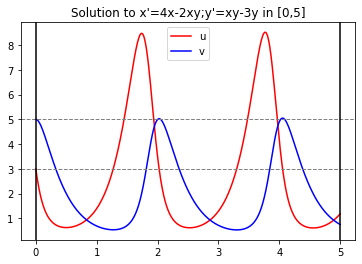

In [51]:
import numpy as np
def f1(x,y1,y2):return 4*y1-2*y1*y2
def f2(x,y1,y2):return y1*y2-3*y2
n=1000
y1_it,y2_it=odevec_euler_vary(f1,f2,0,5,3,5,n)
print('u的数值解为',y1_it)
print('v的数值解为',y2_it)

x=np.linspace(0,5,n+1)
plt.plot(x,y1_it,color='red',linewidth=1.5,label='u')
plt.plot(x,y2_it,color='blue',linewidth=1.5,label='v')
plt.axhline(3, color='gray', linewidth=1, linestyle='--')
plt.axhline(5, color='gray', linewidth=1, linestyle='--')
plt.axvline(0, color='black')
plt.axvline(5, color='black')
plt.title("Solution to x'=4x-2xy;y'=xy-3y in [0,5]")
plt.legend()
plt.show()

#### 3.&emsp;用自适应步长算法，求解初值问题
$$\begin{cases}
u'=u-t^2+1\quad t\in(0,2]\\
u(0)=0.5\\
\end{cases}$$

数值解为 [0.5        0.65735351 0.82917242 1.01487491 1.21381797 1.42529099
 1.64846105 1.88250672 2.1264692  2.37928891 2.63979493 2.90669329
 3.17851783 3.45373504 3.73055749 4.00716466 4.28134382 4.55071165
 4.81269138 5.06435543 5.30255363]


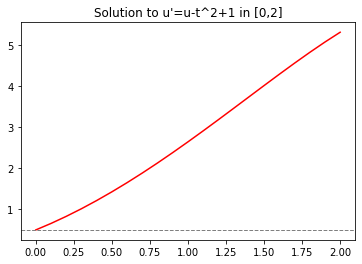

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):return y-x**2+1
n=20
y=ode_euler_vary(f,0,2,0.5,n)
print('数值解为',y)

x=np.linspace(0,2,n+1)
plt.plot(x,y,color='red',linewidth=1.5)
plt.axhline(0.5, color='gray', linewidth=1, linestyle='--')
plt.title("Solution to u'=u-t^2+1 in [0,2]")
plt.show()

## 3&emsp;作业
#### **1.&emsp;刚性问题**
实验目的：刚性问题<br/>
实验内容：用自适应步长算法，求解刚性问题
$$\begin{cases}
y'=5e^{5x}(y-x)^2+1\quad x\in(0,1]\\
y(0)=-1\\
\end{cases}$$
该问题的真解$y(x)=x-e^{-5x}$，并对计算结果进行分析。

h=0.2时梯形公式的数值解为 [-1.         -0.99400834 -0.98804161 ...  0.99119997  0.99223388
  0.99326763]


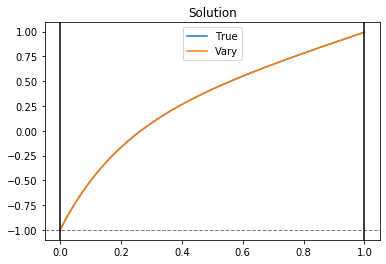

自适应步长算法与真解的结果几乎没有差别


In [66]:
import numpy as np

def f(x,y):return 5*np.e**(5*x)*(y-x)**2+1

y=ode_euler_vary(f,0,1,-1,1000)
print('h=0.2时梯形公式的数值解为',y)

x=np.linspace(0,1,1001)
plt.plot(x,x-np.e**(-5*x),label='True')
plt.plot(x,y,label='Vary')
plt.axhline(-1, color='gray', linewidth=1, linestyle='--')
plt.axvline(0, color='black')
plt.axvline(1, color='black')
plt.title("Solution")
plt.legend()
plt.show()
print('自适应步长算法与真解的结果几乎没有差别')

#### **2.&emsp;常微分方程组**
实验目的：常微分方程组<br/>
实验内容：用自适应步长算法，求解常微分方程组初值问题
$$\left(\begin{array}{c}u'\\ v'\\\end{array}\right)=
\left(\begin{array}{cc}32&66\\ -66&-133\\\end{array}\right)
\left(\begin{array}{c}u\\ v\\\end{array}\right)+
\left(\begin{array}{c}\frac23x+\frac23\\ -\frac13x+\frac13\\\end{array}\right)
\quad x\in(0,0.5]$$
初值条件为
$$\left(\begin{array}{c}u(0)\\ v(0)\\\end{array}\right)=
\left(\begin{array}{c}\frac13\\ \frac13\\\end{array}\right)$$

u的数值解为 [0.33333333 0.34962181 0.36512551 ... 0.90758063 0.90784652 0.90811244]
v的数值解为 [ 0.33333333  0.30108975  0.27041582 ... -0.44712365 -0.44725659
 -0.44738955]


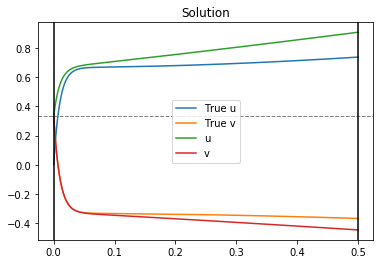

In [69]:
import numpy as np

def f1(x,y1,y2):return 32*y1+66*y2+2/3*x+2/3
def f2(x,y1,y2):return -66*y1-133*y2-1/3*x+1/3
n=1000

y1_it,y2_it=odevec_euler_vary(f1,f2,0,0.5,1/3,1/3,n)
print('u的数值解为',y1_it)
print('v的数值解为',y2_it)

x=np.linspace(0,0.5,n+1)
plt.plot(x,2/3*x+2/3*np.e**(-x)-2/3*np.e**(-100*x),linewidth=1.5,label='True u')
plt.plot(x,-1/3*x-1/3*np.e**(-x)+2/3*np.e**(-100*x),linewidth=1.5,label='True v')
plt.plot(x,y1_it,linewidth=1.5,label='u')
plt.plot(x,y2_it,linewidth=1.5,label='v')
plt.axhline(1/3, color='gray', linewidth=1, linestyle='--')
plt.axvline(0, color='black')
plt.axvline(0.5, color='black')
plt.title("Solution")
plt.legend()
plt.show()